# Cannabis NLP Project

### Introduction

In this project, a Cannabis datasets found on Kaggle (https://www.kaggle.com/nvisagan/cannabis-strains-features) have been analyzed visualized. Also a simple NLP model has been created to predict the type of cannabis by its description.

In [1]:
#importing required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
#reading the csv file
df = pd.read_csv('Cannabis StrainsFeatures - cannabis.csv')
df.head()

,Strain,Type,Rating,Effects,Flavor,Description
0,100-Og,hybrid,4.0,"Creative,Energetic,Tingly,Euphoric,Relaxed","Earthy,Sweet,Citrus",$100 OG is a 50/50 hybrid strain that packs a ...
1,98-White-Widow,hybrid,4.7,"Relaxed,Aroused,Creative,Happy,Energetic","Flowery,Violet,Diesel",The ‘98 Aloha White Widow is an especially pot...
2,1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy/Herbal,Sage,Woody",1024 is a sativa-dominant hybrid bred in Spain...
3,13-Dawgs,hybrid,4.2,"Tingly,Creative,Hungry,Relaxed,Uplifted","Apricot,Citrus,Grapefruit",13 Dawgs is a hybrid of G13 and Chemdawg genet...
4,24K-Gold,hybrid,4.6,"Happy,Relaxed,Euphoric,Uplifted,Talkative","Citrus,Earthy,Orange","Also known as Kosher Tangie, 24k Gold is a 60%..."


In [3]:
#importing required modules
import sqlite3
warnings.filterwarnings("ignore")

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
import nltk
import re
%matplotlib inline

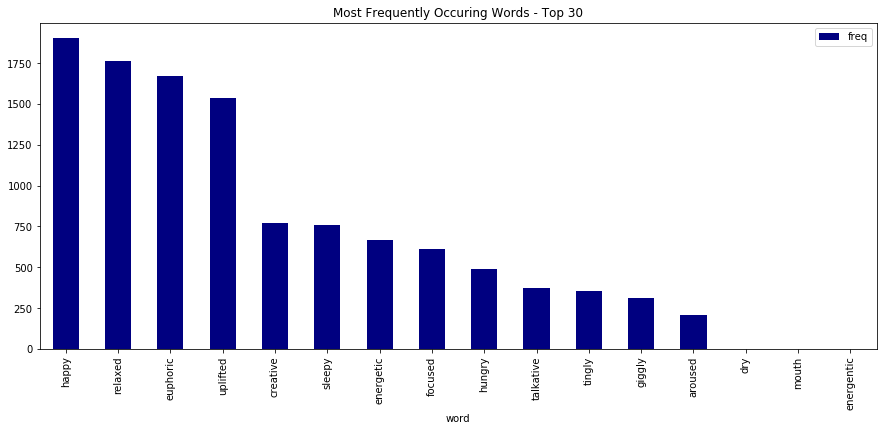

In [4]:
#frequency of words in the Effects column

cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(df.Effects) #learn a vocabulary
sum_words = words.sum(axis=0)


words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', color='navy', figsize=(15, 6))
plt.title("Most Frequently Occuring Words - Top 30")
plt.show()

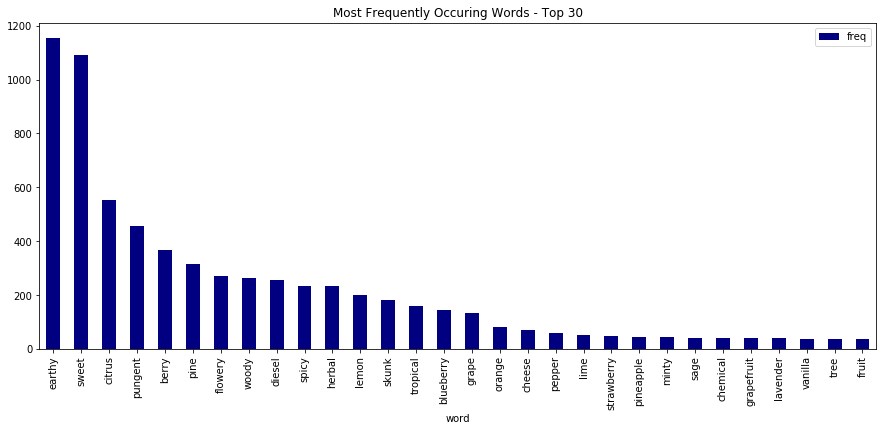

In [5]:
#frequency of words in the Flavour column

cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(df.Flavor.dropna()) #learn a vocabulary
sum_words = words.sum(axis=0)


words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', color='navy', figsize=(15, 6))
plt.title("Most Frequently Occuring Words - Top 30")
plt.show()

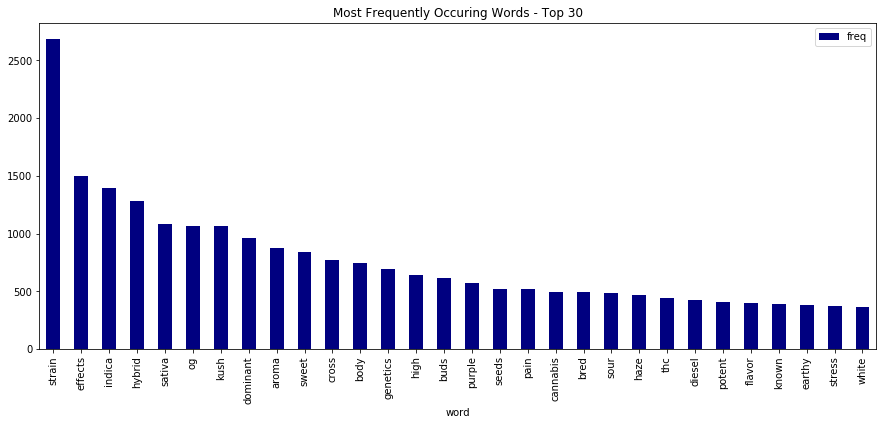

In [6]:
#frequency of words in the Description column

cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(df.Description.dropna()) #learn a vocabulary
sum_words = words.sum(axis=0)


words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', color='navy', figsize=(15, 6))
plt.title("Most Frequently Occuring Words - Top 30")
plt.show()

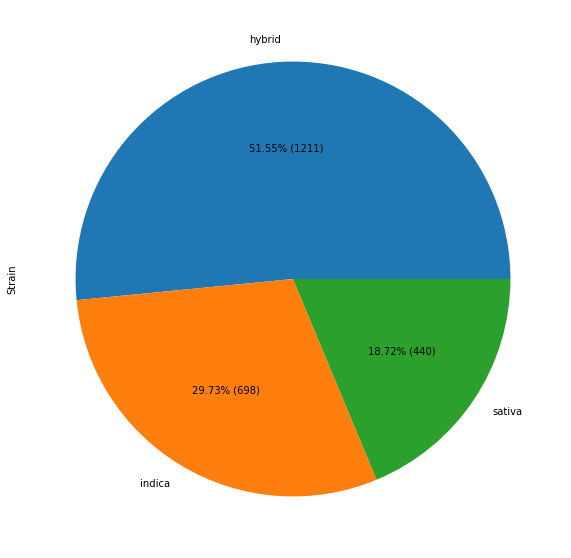

In [34]:
plt.figure(figsize=(10,10))
total = mldf.groupby('Type')['Strain'].count().sum()
df.groupby('Type')['Strain'].count().plot(kind='pie', autopct=lambda p:'{:.2f}% ({:.0f})'.format(p,p * total / 100))

In [7]:
#removing rows containing nan values
mldf = df.dropna()

# Natural Language Processing

In [8]:
import string

In [9]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kaveh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
def text_process (text):
    nopunc = [c for c in text if c not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [11]:
mldf['Description'].apply(text_process)

0       [100, OG, 5050, hybrid, strain, packs, strong,...
1       [‘98, Aloha, White, Widow, especially, potent,...
2       [1024, sativadominant, hybrid, bred, Spain, Me...
3       [13, Dawgs, hybrid, G13, Chemdawg, genetics, b...
4       [Also, known, Kosher, Tangie, 24k, Gold, 60, i...
5       [3, Bears, OG, Mephisto, Genetics, autofloweri...
6       [3, Kings, marijuana, strain, holy, trinity, H...
7       [indicadominant, 303, OG, Colorado, strain, br...
8       [3D, CBD, Snoop, Dogg’s, branded, line, cannab...
9       [Also, known, Optimus, Prime, indicadominant, ...
10      [3rd, Coast, Panama, Chunk, Bedford, Grow, cro...
11      [501st, OG, bred, Rare, Dankness, indicadomina...
12      [Elemental, Seeds, crossed, Blackberry, Spark,...
13      [strain, emerged, Humboldt, County, California...
14      [Bred, Barney’s, Farm, 8, Ball, Kush, pure, in...
15      [Named, telephone, area, code, San, Fernando, ...
16      [831, OG, aka, Santa, Cruz, OG, indicadominant...
17      [9, Po

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

In [14]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(mldf['Description'])

In [15]:
len(bow_transformer.vocabulary_)

11345

In [17]:
cann_bow = bow_transformer.transform(mldf['Description'])

In [18]:
print('Shape of the Sparse matrix: ',cann_bow.shape)

Shape of the Sparse matrix:  (2349, 11345)


In [19]:
cann_bow.nnz

99310

In [20]:
from sklearn.feature_extraction.text import TfidfTransformer

In [21]:
tfidf_transformer = TfidfTransformer().fit(cann_bow)

In [22]:
tfidf_transformer.idf_[bow_transformer.vocabulary_['cannabis']]

3.0957439190257725

In [23]:
cann_tfidf =tfidf_transformer.transform(cann_bow)

In [24]:
from sklearn.naive_bayes import MultinomialNB

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(mldf['Description'], mldf['Type'], test_size=0.3, random_state=101)

In [40]:
from sklearn.pipeline import Pipeline

In [41]:
pipe = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier', RandomForestClassifier())
])

In [42]:
pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x00000124AB69E620>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocesso...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [43]:
pred = pipe.predict(y_test)

In [44]:
from sklearn.metrics import confusion_matrix, classification_report, r2_score

In [45]:
print(confusion_matrix(pred, y_test), 2*'\n', classification_report(pred, y_test))

[[364   0   0]
 [  0 208   0]
 [  0   0 133]] 

              precision    recall  f1-score   support

     hybrid       1.00      1.00      1.00       364
     indica       1.00      1.00      1.00       208
     sativa       1.00      1.00      1.00       133

avg / total       1.00      1.00      1.00       705

